# Part 1:

Reading images

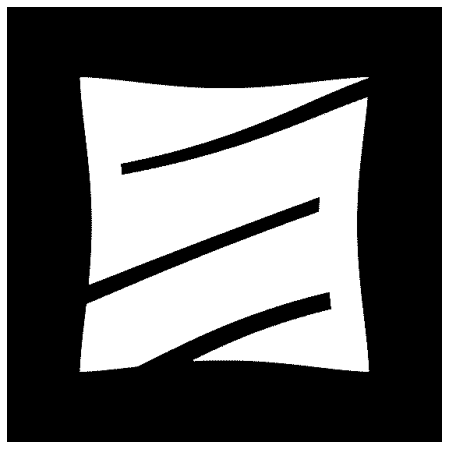

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_41 = cv2.imread("4_1.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(img_41, cmap='gray')
plt.show()


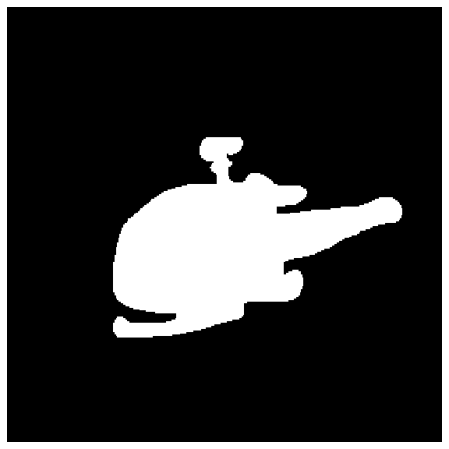

In [59]:
chopper = cv2.imread("chopper.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(chopper, cmap='gray')
plt.show()


# Part 2:

finding boundaries of image 4-1

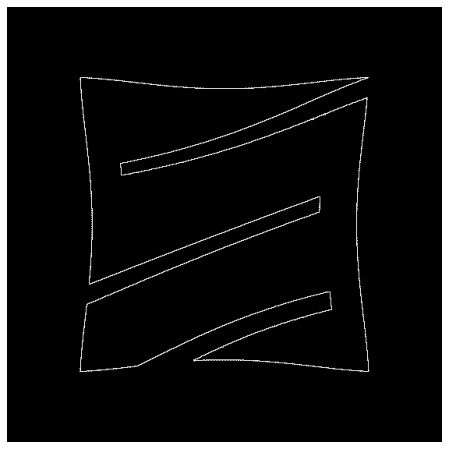

In [60]:
kernel = np.ones((3, 3), np.uint8)
boundaries_41 = img_41 - cv2.erode(img_41, kernel, iterations=1)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(boundaries_41, cmap='gray')
plt.show()


# Part 3:
subtracting chopper from img41

### Answer to question 3 : No. Subtract behaviour in morphology is similar to sets in math

In [61]:
def subtract(img1, img2):
    ans = img1.copy()
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if img1[i][j] == 255:
                if img2[i][j] == 255:
                    ans[i][j] = 0
    return ans


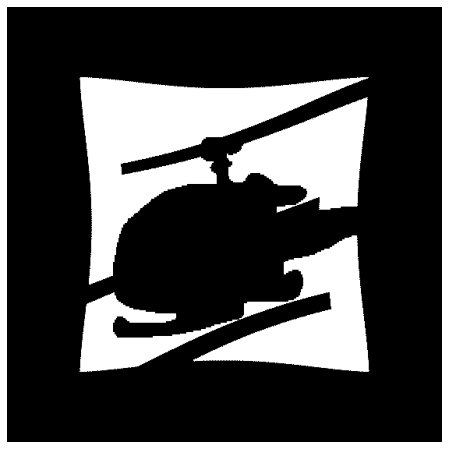

In [62]:
minus = subtract(img_41, chopper)


plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(minus, cmap='gray')
plt.show()


# Part 4:
Reading image blobs

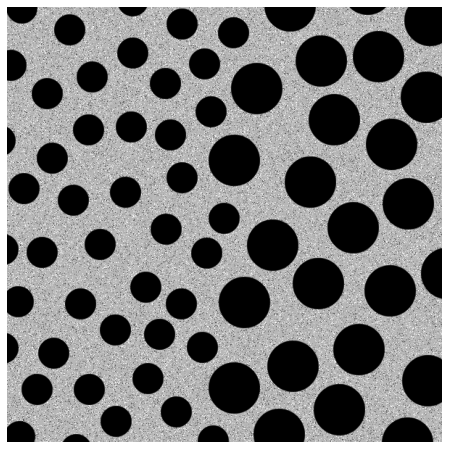

In [63]:
blobs = cv2.imread("Blobs.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(blobs, cmap='gray')
plt.show()

# Part 5:

### We use a closing with 30 radius disk size and a opening with 60 radius disk size

In [64]:
def disk_creator(radius):
    circle_kernel = np.zeros((radius*2, radius*2), np.uint8)
    for i in range(circle_kernel.shape[0]):
        for j in range(circle_kernel.shape[1]):
            if (i-radius)**2+(j-radius)**2 <= radius**2:
                circle_kernel[i][j] = 1
    return circle_kernel


In [65]:
def closing(a, b):
    dilate = cv2.dilate(a, b, iterations=1)
    ans = cv2.erode(dilate, b, iterations=1)
    return ans


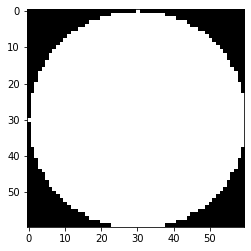

In [66]:
circle_kernel = disk_creator(30)

plt.imshow(circle_kernel, cmap='gray')
plt.show()


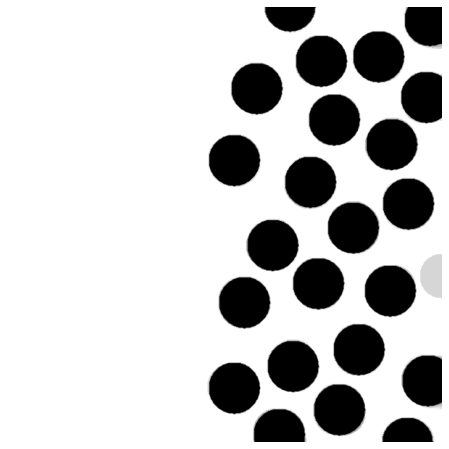

In [67]:
closing_result = closing(blobs, circle_kernel)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(closing_result, cmap='gray')
plt.show()


In [68]:
def opening(a, b):
    tmp = cv2.erode(a, b, iterations=1)
    ans = cv2.dilate(tmp, b, iterations=1)
    return ans


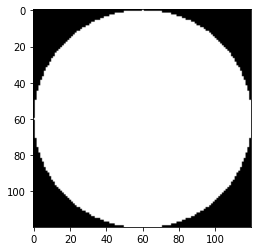

In [69]:
circle_kernel_2 = disk_creator(60)

plt.imshow(circle_kernel_2, cmap='gray')
plt.show()


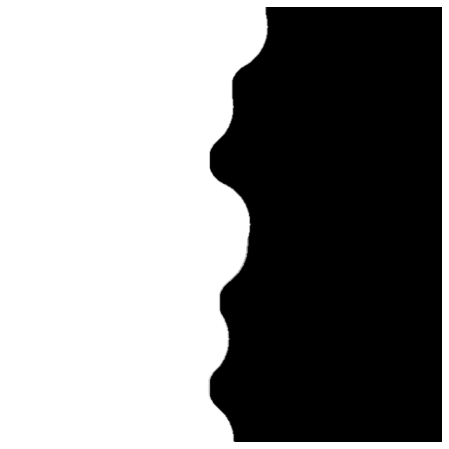

In [70]:
opening_result=opening(closing_result,circle_kernel_2)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(opening_result, cmap='gray')
plt.show()


# Part 6:

### First we smooth our image and then we use opening with 10, 20, 25, 30 radius


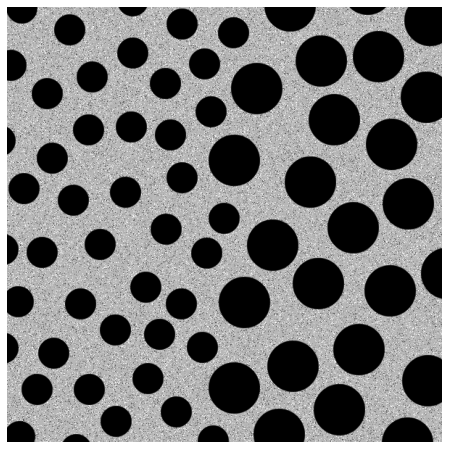

In [71]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(blobs, cmap='gray')
plt.show()

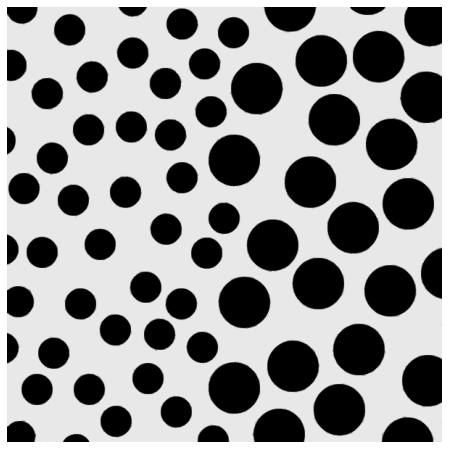

In [72]:
smoothed_blob=cv2.medianBlur(blobs,5)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(smoothed_blob, cmap='gray')
plt.show()

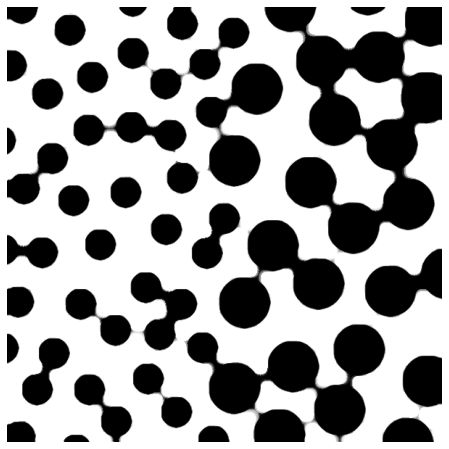

In [73]:
opening_radius_10=opening(smoothed_blob,disk_creator(10))

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(opening_radius_10, cmap='gray')
plt.show()


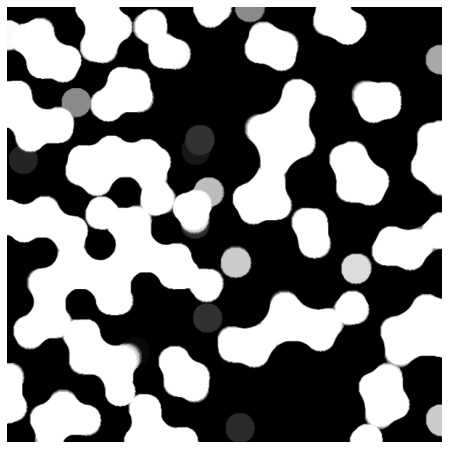

In [74]:
opening_radius_20=opening(smoothed_blob,disk_creator(20))

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(opening_radius_20, cmap='gray')
plt.show()


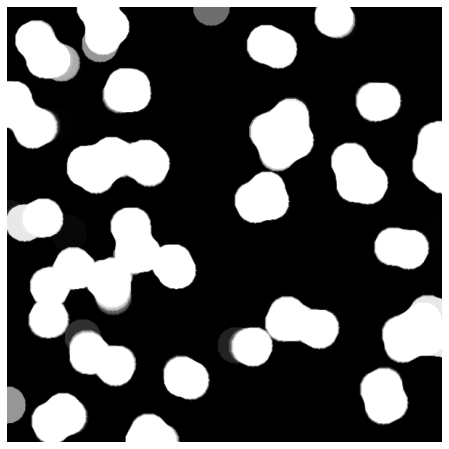

In [75]:
opening_radius_25=opening(smoothed_blob,disk_creator(25))

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(opening_radius_25, cmap='gray')
plt.show()


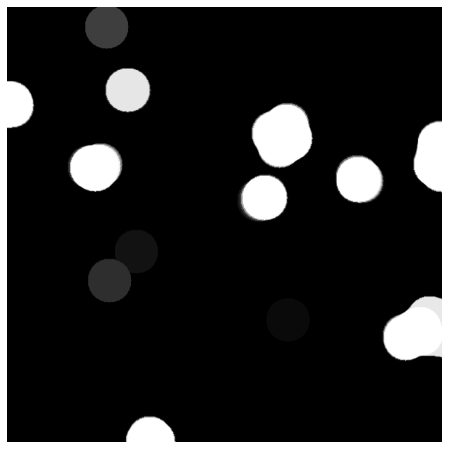

In [76]:
opening_radius_30=opening(smoothed_blob,disk_creator(30))

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(opening_radius_30, cmap='gray')
plt.show()